This notebook illustrates how to change plotting options in Notebooks, when working with R.

### Introduction

To use R with Jupyter, under the hood the Jupyter service runs the [IRKernel](https://irkernel.github.io/). This kernel communicates between R and the Jupyter service.

IRKernel allows you to specify different options for plotting. For example, you can change:

* whether to display images as SVG or PNG
* the plot size, i.e. the height and width

### Changing the plot mimetype

The mimetype specifies how the plot returns from R to your browser. For example, the format can be SVG (Scalable vector graphics) or PNG (Portable Network Graphics). Not all browsers handle SVG display very well. 

#### Using "image/png"

In [1]:
# Create a plot with some normally distributed data
library("ggplot2")
set.seed(42)
n <- 1000
p <- ggplot(data.frame(x = rnorm(n), y = rnorm(n)), aes(x=x, y=y)) + 
  geom_point(alpha = 0.25, size = 1, colour = "blue") +
  geom_density2d(colour = "red")

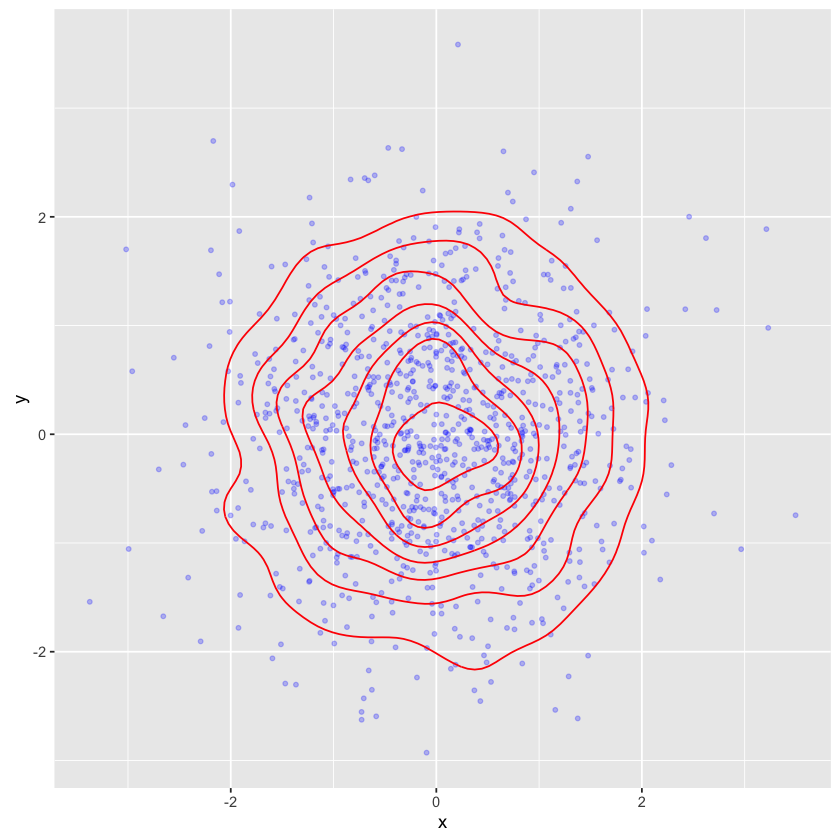

In [2]:
p

In [3]:
# Change mimetype to PNG
options(jupyter.plot_mimetypes = "image/png") 
#options(jupyter.plot_mimetypes = "image/svg+xml") 

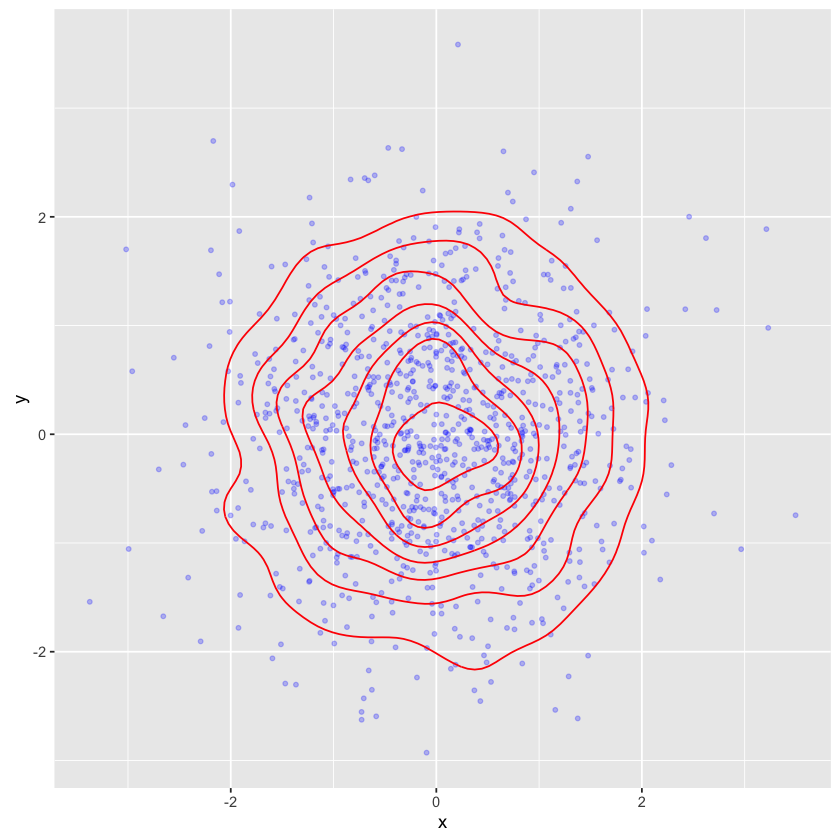

In [4]:
p

### Changing the plot size
You can change the plot size by setting the option repr.plot.width and repr.plot.height.
The `repr` package is part of the IRKernel (the machinery that connects Jupyter and R), and specifically handles representations of objects, including plots.

Try setting the plot width to 4, for a plot that fills only about half the available screen width:

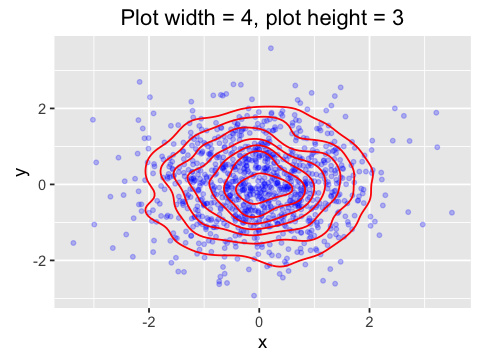

In [5]:
options(repr.plot.width = 4, repr.plot.height = 3)
p + ggtitle(sprintf(
    "Plot width = %s, plot height = %s", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

In [4]:
options()

$add.smooth
[1] TRUE

$bitmapType
[1] "quartz"

$browser
[1] "/usr/bin/open"

$browserNLdisabled
[1] FALSE

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (file = ifelse(onefile, "Rplots.pdf", "Rplot%03d.pdf"), 
    width, height, onefile, family, title, fonts, version, paper, 
    encoding, bg, fg, pointsize, pagecentre, colormodel, useDingbats, 
    useKerning, fillOddEven, compress) 
{
    initPSandPDFfonts()
    new <- list()
    if (!missing(width)) 
        new$width <- width
    if (!missing(height)) 
        new$height <- height
    if (!missing(onefile)) 
        new$onefile <- onefile
    if (!missing(title)) 
        new$title <- title
    if (!missing(fonts)) 
        new$fonts <- fonts
    if (!missing(version)) 
        new$version <- version
    if (!missing(paper)) 
        new$paper <- paper
    if (!missing(encoding)) 
        new$encoding <- encoding
    if (!missing(bg)) 
        new$bg <- bg
    if (!missing(fg)) 
        new$fg <- fg
    if (!missing(pointsize)) 
        new$pointsize <- pointsize
    if (!missing(pagecentre)) 
        new$pagecentre <- pagecentre
    if (!missing(colormodel)) 
        new$colormodel <- colormodel
    if (!missing(useDingbats)) 
        new$useDingbats <- useDingbats
    if (!missing(useKerning)) 
        new$useKerning <- useKerning
    if (!missing(fillOddEven)) 
        new$fillOddEven <- fillOddEven
    if (!missing(compress)) 
        new$compress <- compress
    old <- check.options(new, name.opt = ".PDF.Options", envir = .PSenv)
    if (!missing(family) && (inherits(family, "Type1Font") || 
        inherits(family, "CIDFont"))) {
        enc <- family$encoding
        if (inherits(family, "Type1Font") && !is.null(enc) && 
            enc != "default" && (is.null(old$encoding) || old$encoding == 
            "default")) 
            old$encoding <- enc
        family <- family$metrics
    }
    if (is.null(old$encoding) || old$encoding == "default") 
        old$encoding <- guessEncoding()
    if (!missing(family)) {
        if (length(family) == 4L) {
            family <- c(family, "Symbol.afm")
        }
        else if (length(family) == 5L) {
        }
        else if (length(family) == 1L) {
            pf <- pdfFonts(family)[[1L]]
            if (is.null(pf)) 
                stop(gettextf("unknown family '%s'", family), 
                  domain = NA)
            matchFont(pf, old$encoding)
        }
        else stop("invalid 'family' argument")
        old$family <- family
    }
    version <- old$version
    versions <- c("1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", 
        "2.0")
    if (version %in% versions) 
        version <- as.integer(strsplit(version, "[.]")[[1L]])
    else stop("invalid PDF version")
    onefile <- old$onefile
    if (!checkIntFormat(file)) 
        stop(gettextf("invalid 'file' argument '%s'", file), 
            domain = NA)
    .External(C_PDF, file, old$paper, old$family, old$encoding, 
        old$bg, old$fg, old$width, old$height, old$pointsize, 
        onefile, old$pagecentre, old$title, old$fonts, version[1L], 
        version[2L], old$colormodel, old$useDingbats, old$useKerning, 
        old$fillOddEven, old$compress)
    invisible()
}
<bytecode: 0x7fba33161b40>
<environment: namespace:grDevices>

$device.ask.default
[1] FALSE

$digits
[1] 7

$download.file.method
[1] "libcurl"

$dvipscmd
[1] "dvips"

$echo
[1] FALSE

$editor
[1] "emacs -nw"

$encoding
[1] "native.enc"

$example.ask
[1] "default"

$expressions
[1] 5000

$help.search.types
[1] "vignette" "demo"     "help"    

$help.try.all.packages
[1] FALSE

$HTTPUserAgent
[1] "R (3.2.4 x86_64-apple-darwin14.5.0 x86_64 darwin14.5.0)"

$install.packages.compile.from.source


In [9]:
library(ggplot2)
library(ggthemes)
my_theme = ggthemes::theme_hc() +
    theme(
        axis.text=element_text(size=14),
        axis.title=element_text(size=16),
        plot.title=element_text(size=22))